# Stablecoin Peg Simulator

This notebook simulates how a collateral-backed stablecoin maintains or loses its peg under different stress scenarios. We explore three regimes: stable, fragile, and catastrophic, to understand the dynamics of collateral ratio and peg erosion.

## Global Parameters
These are the constants shared across all scenarios.

In [1]:
# Shared Libraries and Base Parameters
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

liquidation_threshold = 1.5
min_peg_price = 0.80
confidence_decay = 0.01
days = 30
collateral_amount = 1000  # ETH


## Scenario 1: Healthy System (Stable Peg)
In this baseline case, we simulate a gradually falling collateral price that does not breach the liquidation threshold.

**Expected Outcome:** The peg remains stable at $1.00 throughout the simulation.

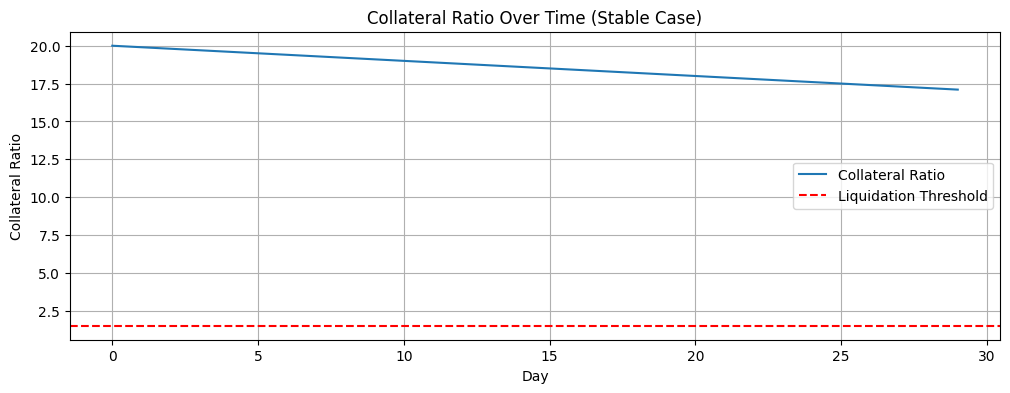

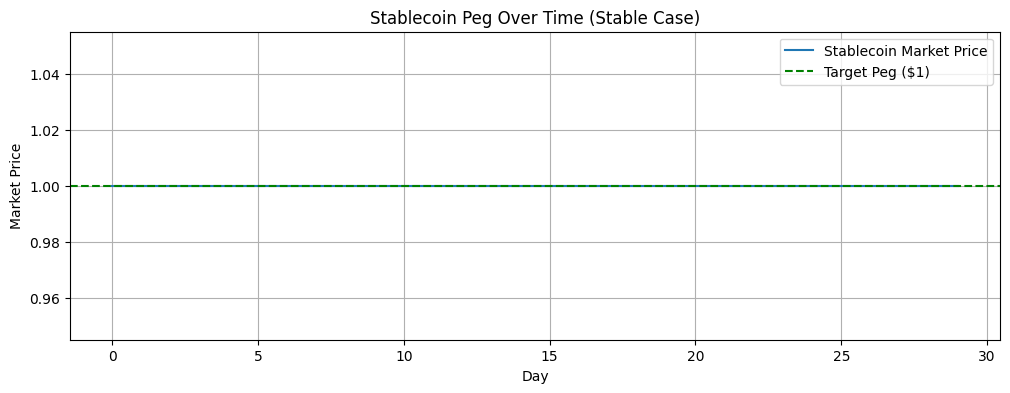

In [2]:
initial_collateral_price = 2000
price_drop_per_day = 10
stablecoin_supply = 100000

collateral_ratios, peg_prices = [], []
market_price = 1.00

for day in range(days):
    collateral_price = max(0.01, initial_collateral_price - price_drop_per_day * day)
    collateral_value = collateral_price * collateral_amount
    cratio = collateral_value / stablecoin_supply
    if cratio < liquidation_threshold:
        market_price = max(min_peg_price, market_price - confidence_decay)
    collateral_ratios.append(cratio)
    peg_prices.append(market_price)

# Plot
plt.figure(figsize=(12, 4))
plt.plot(collateral_ratios, label='Collateral Ratio')
plt.axhline(y=liquidation_threshold, color='r', linestyle='--', label='Liquidation Threshold')
plt.title('Collateral Ratio Over Time (Stable Case)')
plt.xlabel('Day')
plt.ylabel('Collateral Ratio')
plt.legend()
plt.grid(True)
plt.savefig("images/healthy-cr-ratio-plot.png")
plt.show()


plt.figure(figsize=(12, 4))
plt.plot(peg_prices, label='Stablecoin Market Price')
plt.axhline(y=1.0, color='g', linestyle='--', label='Target Peg ($1)')
plt.title('Stablecoin Peg Over Time (Stable Case)')
plt.xlabel('Day')
plt.ylabel('Market Price')
plt.legend()
plt.grid(True)
plt.savefig("images/healthy-stablecoin-mkt-price.png")
plt.show()


**Interpretation:**
Collateral ratio stays safely above the liquidation threshold. The peg remains fully stable at $1.00 — no confidence loss occurs.

## Scenario 2: Gradual Decay
Now we simulate a more aggressive drop in collateral value. The collateral ratio eventually falls below the threshold.

**Expected Outcome:** Peg starts slipping by $0.01/day after the threshold breach.

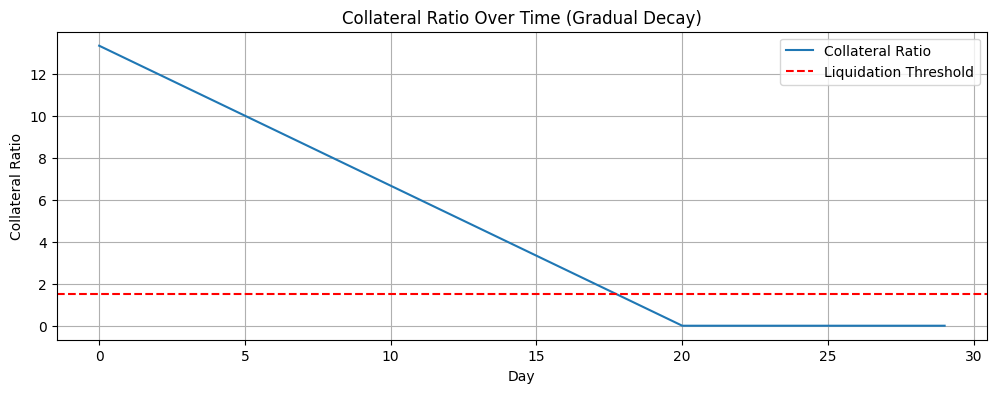

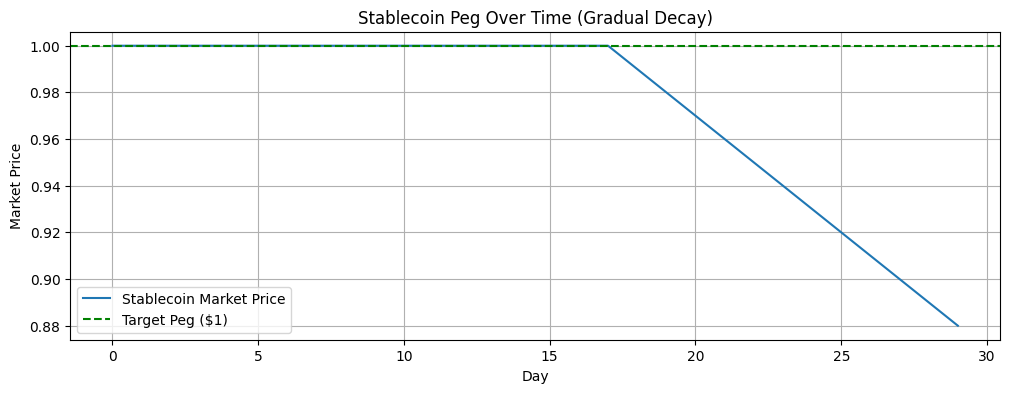

In [3]:
initial_collateral_price = 2000
price_drop_per_day = 100
stablecoin_supply = 150000

collateral_ratios, peg_prices = [], []
market_price = 1.00

for day in range(days):
    collateral_price = max(0.01, initial_collateral_price - price_drop_per_day * day)
    collateral_value = collateral_price * collateral_amount
    cratio = collateral_value / stablecoin_supply
    if cratio < liquidation_threshold:
        market_price = max(min_peg_price, market_price - confidence_decay)
    collateral_ratios.append(cratio)
    peg_prices.append(market_price)

plt.figure(figsize=(12, 4))
plt.plot(collateral_ratios, label='Collateral Ratio')
plt.axhline(y=liquidation_threshold, color='r', linestyle='--', label='Liquidation Threshold')
plt.title('Collateral Ratio Over Time (Gradual Decay)')
plt.xlabel('Day')
plt.ylabel('Collateral Ratio')
plt.legend()
plt.grid(True)
plt.savefig("images/gradual-decay-cr-ratio-plot.png")
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(peg_prices, label='Stablecoin Market Price')
plt.axhline(y=1.0, color='g', linestyle='--', label='Target Peg ($1)')
plt.title('Stablecoin Peg Over Time (Gradual Decay)')
plt.xlabel('Day')
plt.ylabel('Market Price')
plt.legend()
plt.grid(True)
plt.savefig("images/gradual-stablecoin-mkt-price.png")
plt.show()

**Interpretation:**
The system enters fragility as the collateral ratio drops below 1.5. The peg gradually decays, showing how confidence erosion kicks in even before full collapse.

## Scenario 3: Full Collapse
This scenario simulates a severe price crash that causes the collateral ratio to collapse quickly.

**Expected Outcome:** Peg hits the floor ($0.80) after aggressive decay.

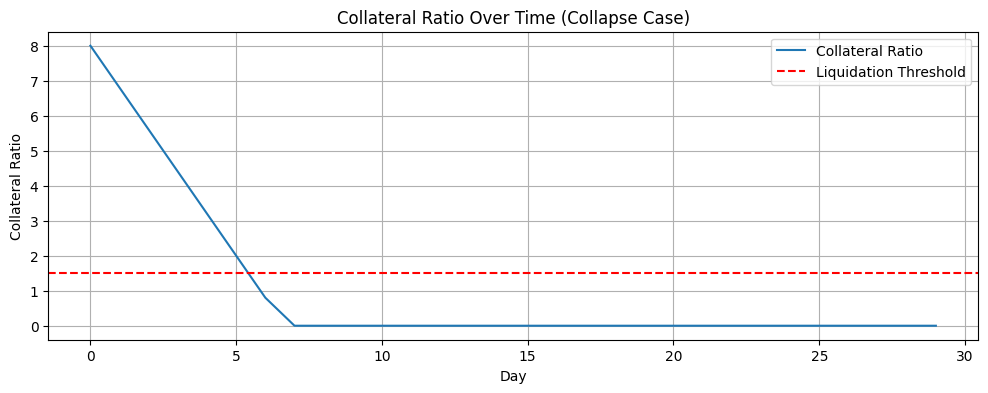

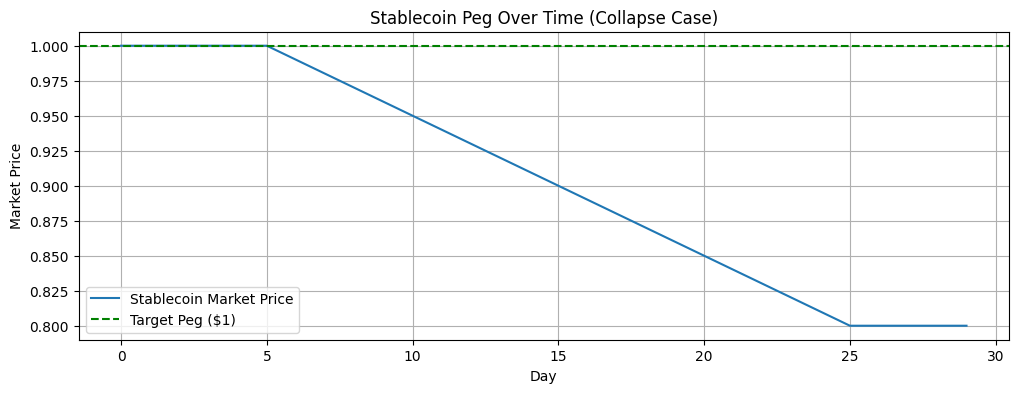

In [4]:
initial_collateral_price = 2000
price_drop_per_day = 300
stablecoin_supply = 250000

collateral_ratios, peg_prices = [], []
market_price = 1.00

for day in range(days):
    collateral_price = max(0.01, initial_collateral_price - price_drop_per_day * day)
    collateral_value = collateral_price * collateral_amount
    cratio = collateral_value / stablecoin_supply
    if cratio < liquidation_threshold:
        market_price = max(min_peg_price, market_price - confidence_decay)
    collateral_ratios.append(cratio)
    peg_prices.append(market_price)

plt.figure(figsize=(12, 4))
plt.plot(collateral_ratios, label='Collateral Ratio')
plt.axhline(y=liquidation_threshold, color='r', linestyle='--', label='Liquidation Threshold')
plt.title('Collateral Ratio Over Time (Collapse Case)')
plt.xlabel('Day')
plt.ylabel('Collateral Ratio')
plt.legend()
plt.grid(True)
plt.savefig("images/full-collapse-cr-ratio-plot.png")
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(peg_prices, label='Stablecoin Market Price')
plt.axhline(y=1.0, color='g', linestyle='--', label='Target Peg ($1)')
plt.title('Stablecoin Peg Over Time (Collapse Case)')
plt.xlabel('Day')
plt.ylabel('Market Price')
plt.legend()
plt.grid(True)
plt.savefig("images/full-collapse-stablecoin-mkt-price.png")
plt.show()

**Interpretation:**
The peg breaks completely and falls to the simulated floor of $0.80, reflecting total loss of confidence as collateralization becomes critically low.

## Conclusion & Insights

These simulations demonstrate how collateral-backed stablecoins can remain stable under mild stress but quickly enter fragility and collapse when collateral value erodes. By varying the stress level and system parameters, we see:

- **Scenario 1**: Overcollateralization preserves stability.
- **Scenario 2**: Peg decay reflects early fragility.
- **Scenario 3**: Extreme conditions trigger total breakdown.

Future improvements could add arbitrage behavior, liquidation auctions, or adaptive confidence models.